In [1]:
# this notebook attempts to explore a credit card dataset from Kaggle: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read dataset
df = pd.read_csv("../data/BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.shape

(10127, 23)

In [6]:
# remove client number and strange classifier columns
df = df.drop([df.columns[0], df.columns[-2], df.columns[-1]], axis=1)

In [7]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
# look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
# look at variable categories
df["Gender"].unique()

array(['M', 'F'], dtype=object)

In [10]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [11]:
df["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [12]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [13]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
# encode ordinal value
mapping_income = {"Unknown": 0,
                  "Less than $40K": 1,
                  "$40K - $60K": 2,
                  "$60K - $80K": 3,
                  "$80K - $120K": 4,
                  "$120K +": 5}

df["Income_Category"] = df["Income_Category"].map(mapping_income)

In [15]:
# encode binary and nominal variables
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == 'M' else 1)
df["Attrition_Flag"] = df["Attrition_Flag"].apply(lambda x: 0 if x == "Existing Customer" else 1) 
education_levels = pd.get_dummies(df["Education_Level"], prefix="Education_Level")
marital_statuses = pd.get_dummies(df["Marital_Status"], prefix="Marital_Status")
card_categories = pd.get_dummies(df["Card_Category"], prefix="Card_Category")

In [16]:
# add dummy features to dataframe
df = pd.concat([df, education_levels, marital_statuses, card_categories], axis=1)

In [17]:
# remove original column from dataframe
df = df.drop(["Education_Level", "Marital_Status", "Card_Category"], axis=1)

In [18]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,3,39,5,1,3,12691.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,0,3,4,36,4,1,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,1,4,1,34,3,4,1,3313.0,...,0,0,0,0,0,1,1,0,0,0
4,0,40,0,3,3,21,5,1,0,4716.0,...,1,0,0,1,0,0,1,0,0,0


In [19]:
#create correlation matrix
corr = df.corr()

<AxesSubplot:>

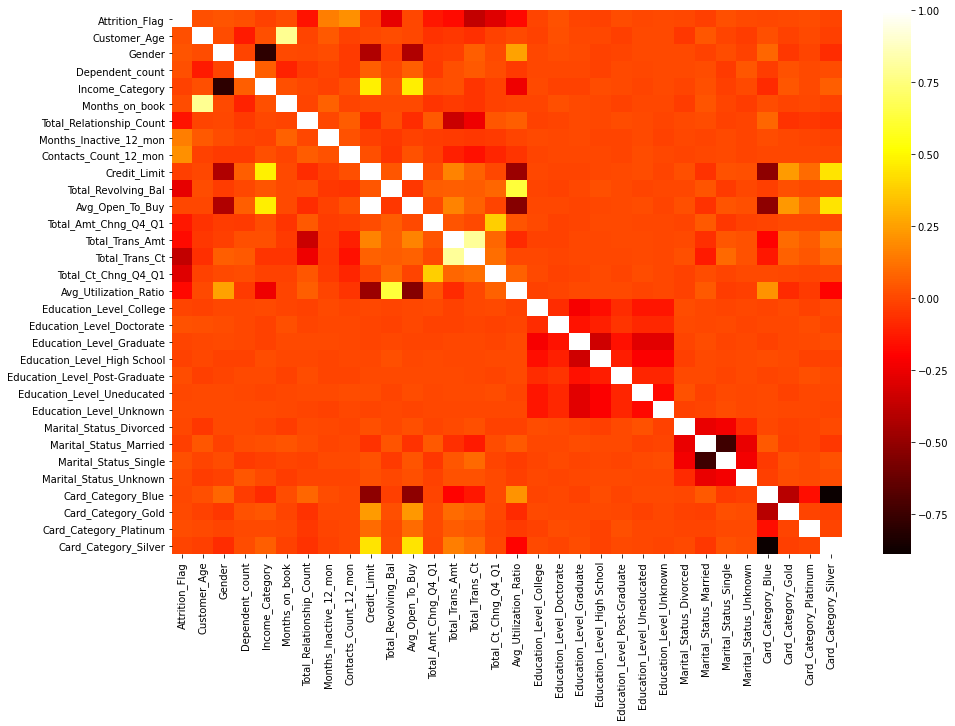

In [20]:
# plot correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr, cmap="hot", ax=ax)

In [43]:
# select a few features that are correlated with the target (Attrition - flag)
threshold = 0.02

In [44]:
# skip the first value, as it's the correlation of the target with itself
features = corr.iloc[:, 0][corr.iloc[:, 0].abs() >= threshold].index

In [45]:
df_selected = df[features]

In [46]:
df_selected.head()

,Attrition_Flag,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Marital_Status_Married
0,0,0,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,0,1
1,0,1,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0,0
2,0,0,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,0,1
3,0,1,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0,0
4,0,0,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,0,1


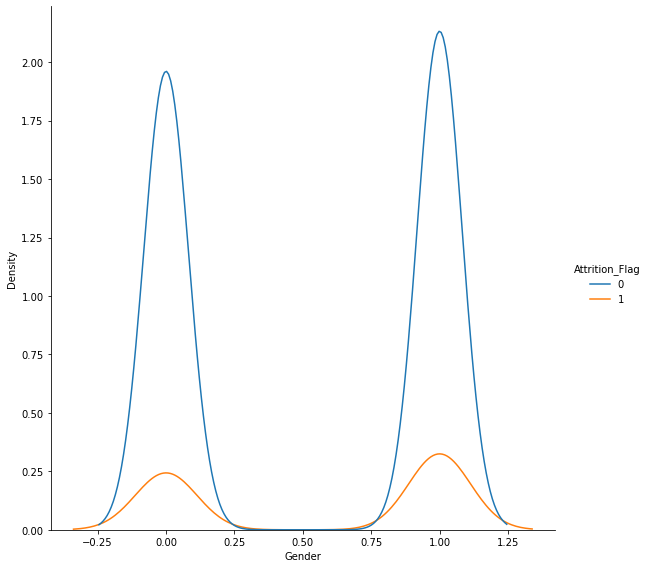

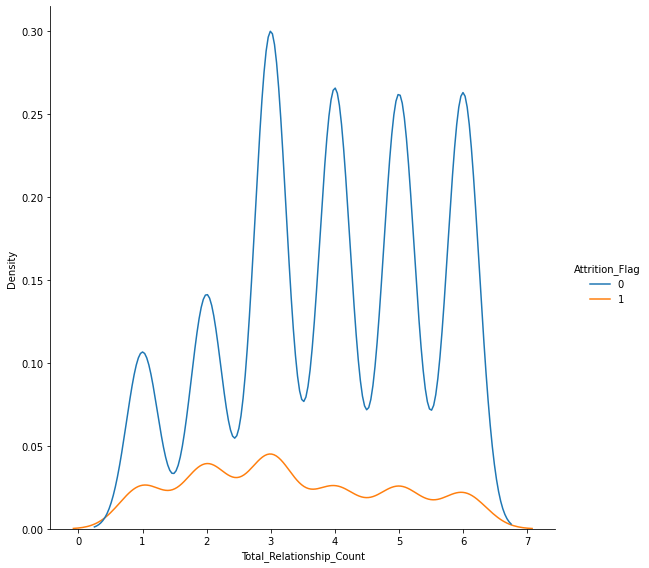

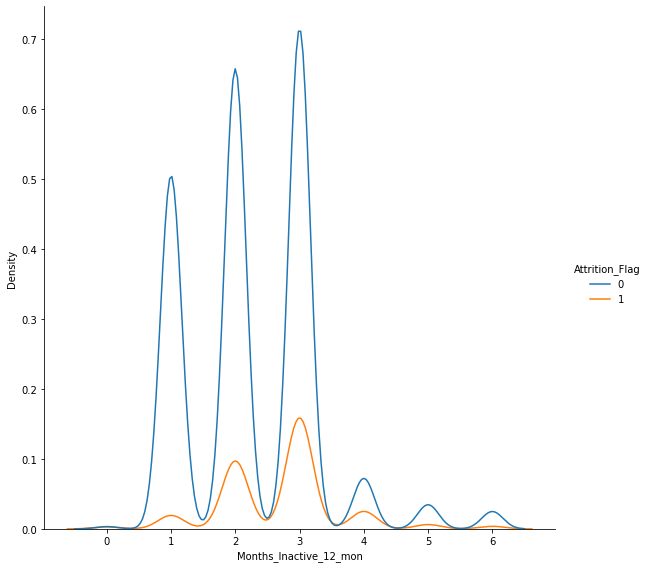

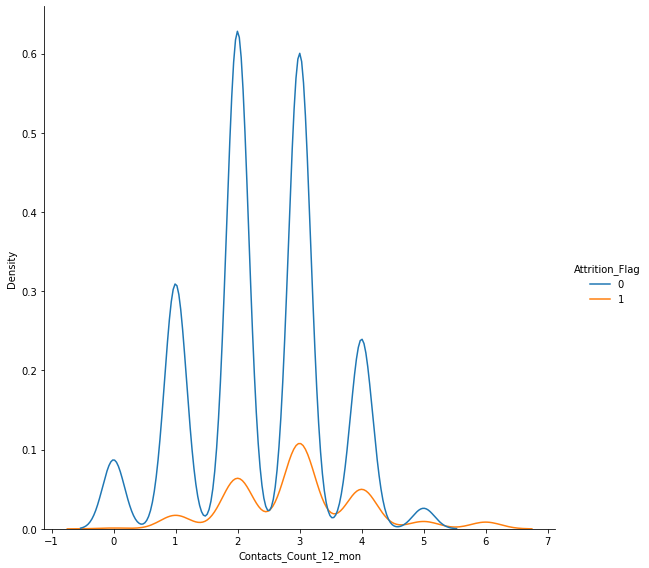

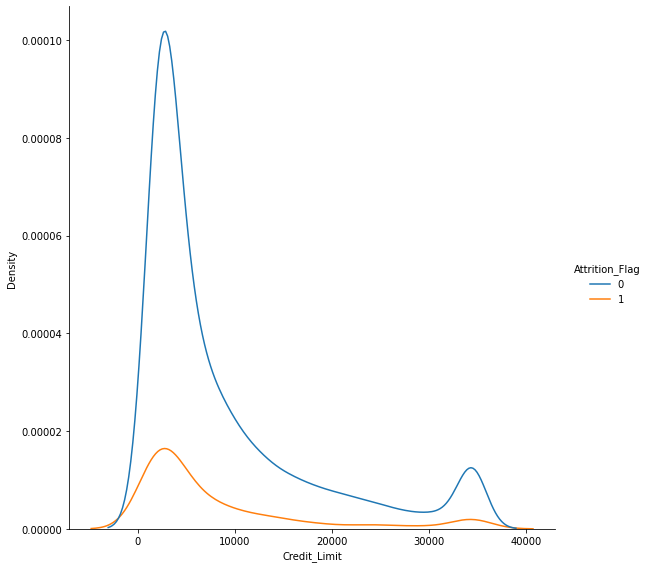

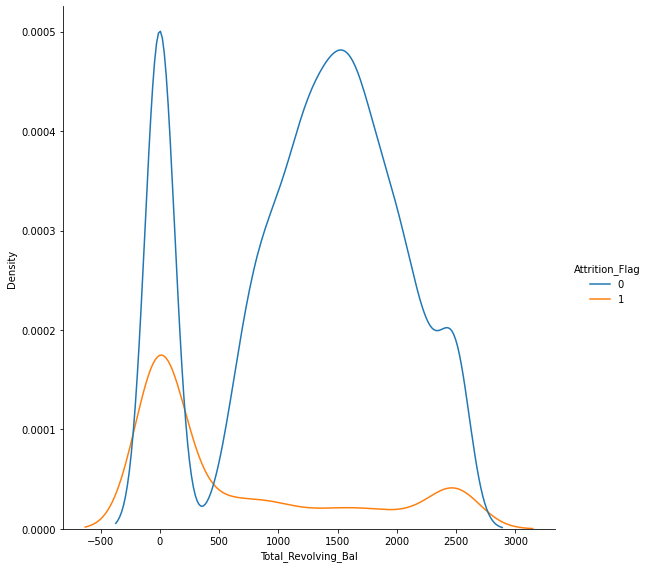

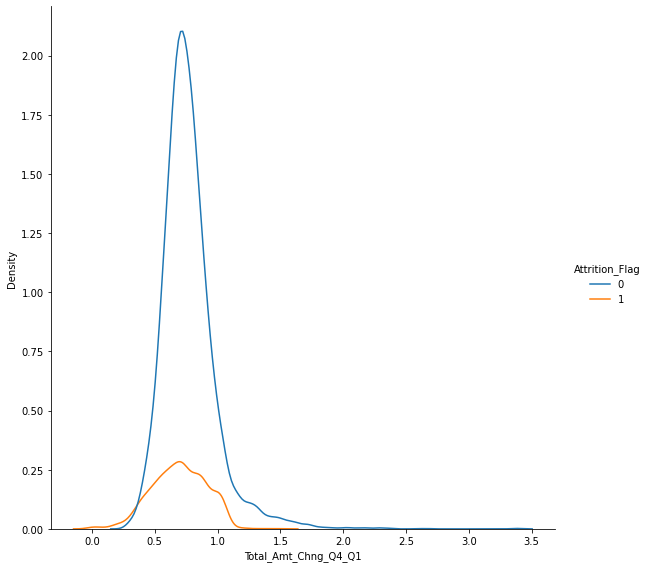

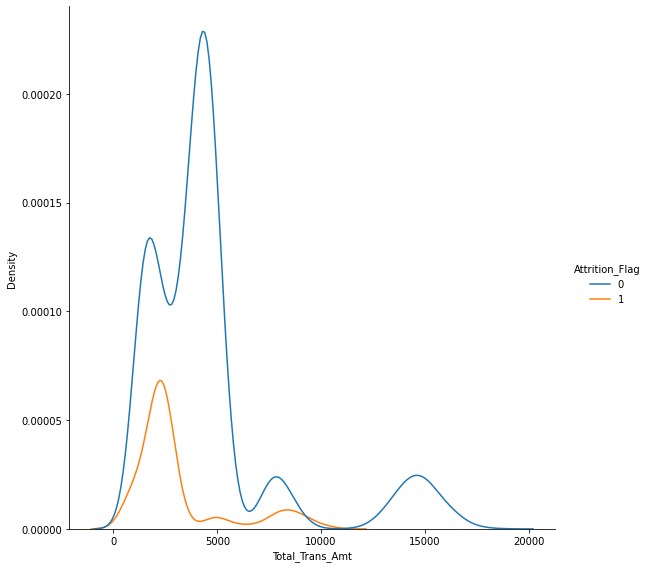

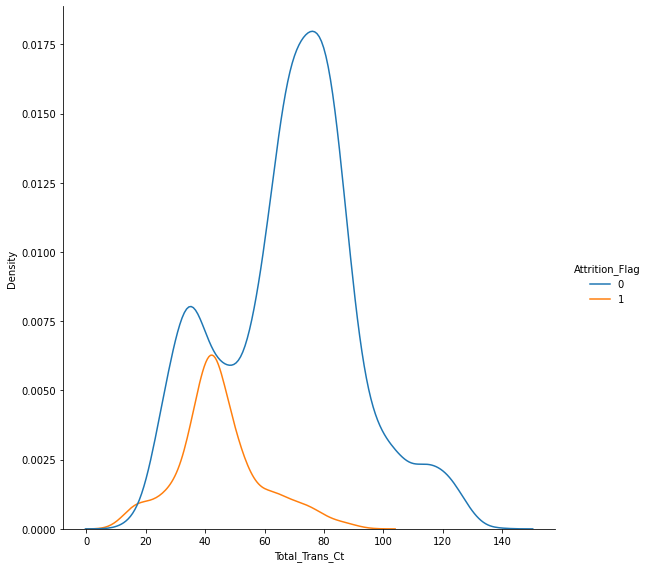

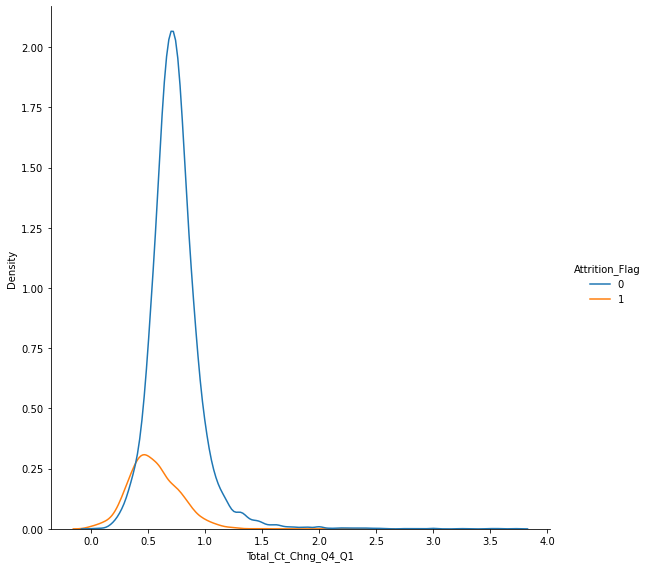

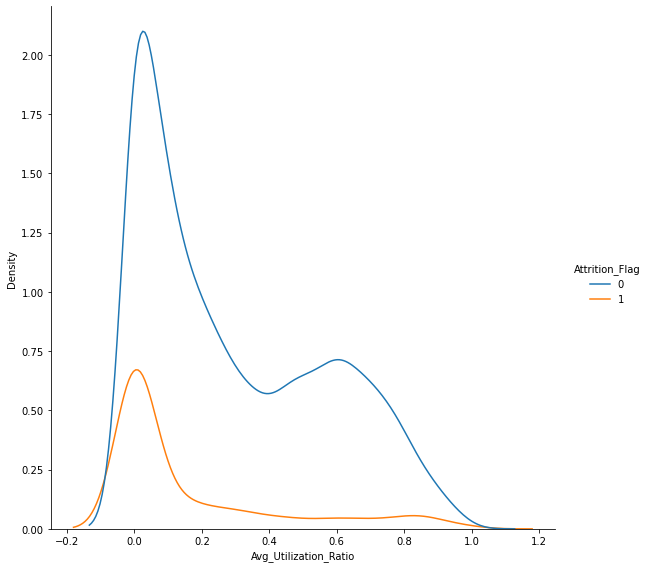

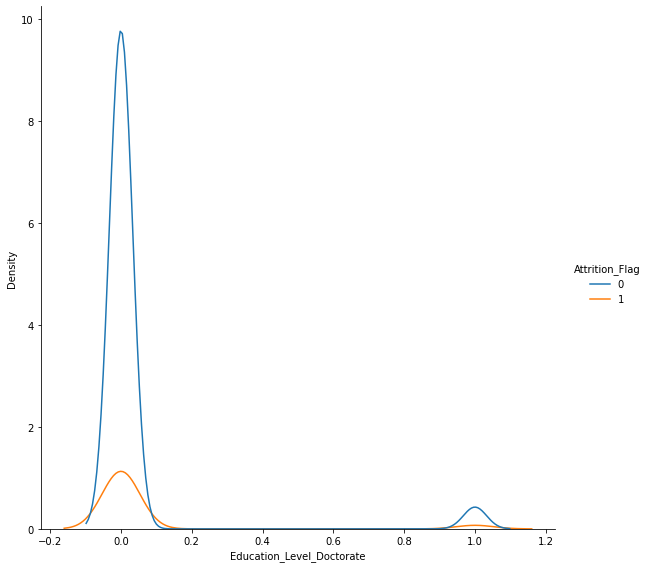

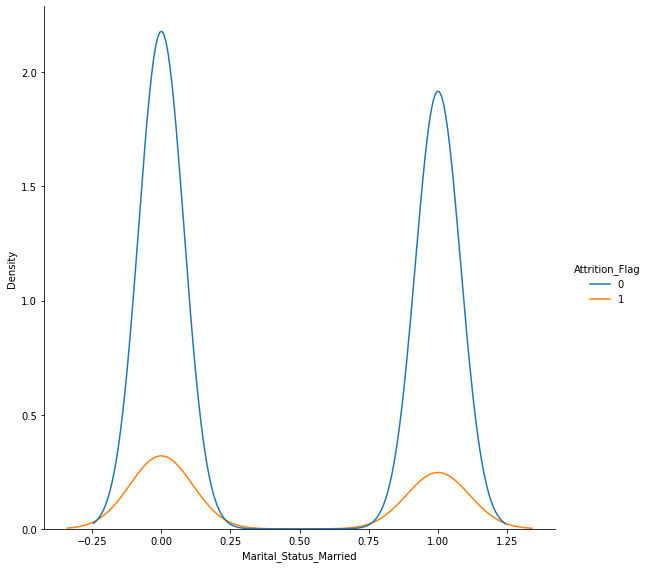

In [47]:
# look at plot of features with target
for col in df_selected.columns[1:]:
    sns.displot(data=df_selected, x=col, hue="Attrition_Flag", kind="kde", height=8)

In [51]:
# apply PCA analysis
from sklearn.decomposition import PCA

pca = PCA()

In [52]:
pca.fit(df_selected)

PCA()

<AxesSubplot:>

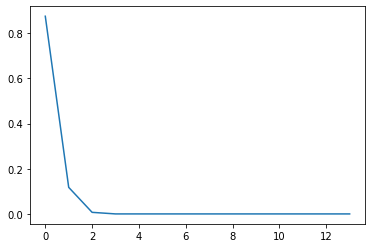

In [53]:
pd.Series(pca.explained_variance_ratio_).plot()

In [72]:
# plot data in 2D using the two principal components
df_pca = pca.transform(df_selected)[:, :2]

In [73]:
df_pca = pd.DataFrame(df_pca, columns=["x","y"])

<AxesSubplot:xlabel='x', ylabel='y'>

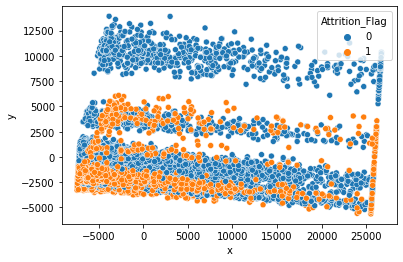

In [75]:
sns.scatterplot(data=df_pca, x="x", y="y", hue=df_selected.Attrition_Flag)

In [76]:
# plot data in 2D with TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [77]:
df_tsne = tsne.fit_transform(df_selected)

In [78]:
df_tsne = pd.DataFrame(df_tsne, columns=["x","y"])

<AxesSubplot:xlabel='x', ylabel='y'>

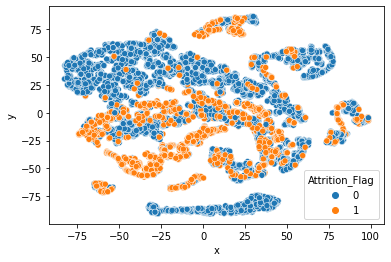

In [79]:
sns.scatterplot(data=df_tsne, x="x", y="y", hue=df_selected.Attrition_Flag)

In [ ]:
# the data doesn't look super discriminative..

In [ ]:
# can we at least overfit on the training data?

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [130]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier()

In [131]:
lr.fit(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])
knn.fit(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])
dt.fit(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])

#lr.fit(df_tsne, df_selected["Attrition_Flag"])
#knn.fit(df_tsne, df_selected["Attrition_Flag"])
#dt.fit(df_tsne, df_selected["Attrition_Flag"])

DecisionTreeClassifier()

In [132]:
lr.score(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])
#lr.score(df_pca, df_selected["Attrition_Flag"])

0.8942431124716106

In [133]:
knn.score(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])
#knn.score(df_pca, df_selected["Attrition_Flag"])

1.0

In [134]:
dt.score(df_selected.drop("Attrition_Flag", axis=1), df_selected["Attrition_Flag"])
#dt.score(df_pca, df_selected["Attrition_Flag"])

1.0